[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Lecture_Code/7_3_P_Values.ipynb)

Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm


Create three predictors but only simulate the target variable using two of the predictors. We are doing this for a specific reason. By simulating the data, we know that x1 and x2 are significant but x3 is not.

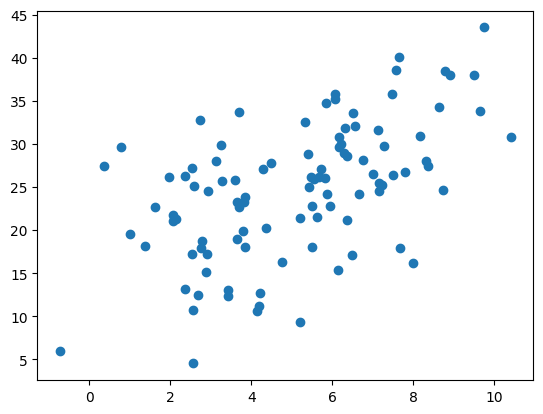

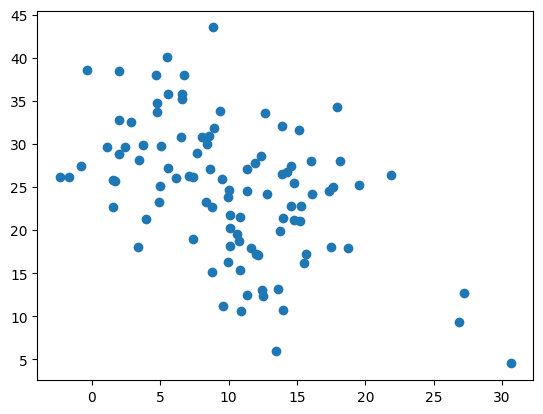

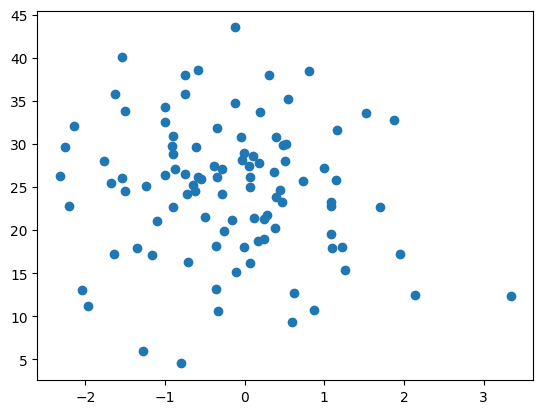

In [2]:
x1 = np.random.normal(5,2.5,100)
x2 = np.random.normal(10,5,100)
x3 = np.random.normal(0,1,100)
Beta_0 = 20
Beta_1 = 2
Beta_2 = -.5
y = Beta_0 + Beta_1*x1 + Beta_2*x2 + np.random.normal(0,5,100)
plt.scatter(x1,y)
plt.show()

plt.scatter(x2,y)
plt.show()

plt.scatter(x3,y)
plt.show()

Fit the model with all 3 variables. This is overfitting because x3 is an extra variable.

In [3]:
fake_dat = pd.DataFrame({"y":y,"x1":x1,"x2":x2,"x3":x3})
mod_reg1 = smf.ols("y ~ x1 + x2 + x3",fake_dat).fit()
mod_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     45.59
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           2.10e-18
Time:                        17:15:15   Log-Likelihood:                -302.46
No. Observations:                 100   AIC:                             612.9
Df Residuals:                      96   BIC:                             623.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.6986      1.436     15.107      0.000      18.847      24.550
x1             1.9414      0.221      8.776      0.000       1.502       2.380
x2            -0.6930      0.084     -8.206      0.000      -0.861      -0.525
x3            -0.5104      0.491     -1.040      0.301      -1.484       0.464
==============================================================================
Omnibus:                        2.077   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.354   Jarque-Bera (JB):                1.888
Skew:                          -0.336   Prob(JB):                        0.389
Kurtosis:                       2.948   Cond. No.                         36.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Load the expenses data set.

In [5]:
exp = pd.read_csv("https://richardson.byu.edu/220/student_expenses.csv")
exp

,Gender,Age,Study_year,Scholarship,Transporting,expenses
0,Female,21,2,No,No,150
1,Male,25,3,No,Motorcycle,220
2,Male,23,2,Yes,No,180
3,Male,19,3,No,Motorcycle,200
4,Female,19,2,No,Motorcycle,300
...,...,...,...,...,...,...
93,Male,19,3,No,Motorcycle,200
94,Female,19,2,No,Motorcycle,300
95,Male,22,3,No,Car,150
96,Female,21,2,Yes,No,200


Fit a model with all the variables.

In [6]:
mod_exp1 = smf.ols("expenses ~ Gender + Age + Study_year + Scholarship + Transporting",exp).fit()
mod_exp1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     7.224
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           2.52e-06
Time:                        17:38:58   Log-Likelihood:                -521.77
No. Observations:                  98   AIC:                             1058.
Df Residuals:                      91   BIC:                             1076.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    150.5851     77.661      1.939      0.056      -3.678     304.848
Gender[T.Male ]               -9.6870     11.589     -0.836      0.405     -32.707      13.333
Scholarship[T.Yes]            18.2222     13.413      1.359      0.178      -8.421      44.865
Transporting[T.Motorcycle]   -38.3451     13.826     -2.773      0.007     -65.809     -10.881
Transporting[T.No]           -73.8941     13.134     -5.626      0.000     -99.983     -47.805
Age                            4.4947      4.685      0.959      0.340      -4.811      13.801
Study_year                     4.6027      8.058      0.571      0.569     -11.403      20.609
==============================================================================
Omnibus:                        0.281   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.869   Jarque-Bera (JB):                0.282
Skew:                           0.121   Prob(JB):                        0.869
Kurtosis:                       2.900   Cond. No.                         309.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Remove the variable that has the highest P-value.

In [7]:
mod_exp2 = smf.ols("expenses ~ Gender + Age + Scholarship + Transporting",exp).fit()
mod_exp2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     8.667
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           9.21e-07
Time:                        17:40:20   Log-Likelihood:                -521.94
No. Observations:                  98   AIC:                             1056.
Df Residuals:                      92   BIC:                             1071.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    123.0221     60.627      2.029      0.045       2.612     243.432
Gender[T.Male ]              -11.8659     10.903     -1.088      0.279     -33.520       9.788
Scholarship[T.Yes]            16.0719     12.827      1.253      0.213      -9.403      41.547
Transporting[T.Motorcycle]   -37.5205     13.700     -2.739      0.007     -64.731     -10.310
Transporting[T.No]           -75.6306     12.730     -5.941      0.000    -100.914     -50.347
Age                            6.5563      2.976      2.203      0.030       0.646      12.467
==============================================================================
Omnibus:                        0.367   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.436
Skew:                           0.140   Prob(JB):                        0.804
Kurtosis:                       2.832   Cond. No.                         240.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Of those that remain, remove the variable with the highest P-value

In [8]:
mod_exp3 = smf.ols("expenses ~  Age + Scholarship + Transporting",exp).fit()
mod_exp3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     10.52
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           4.50e-07
Time:                        17:41:09   Log-Likelihood:                -522.57
No. Observations:                  98   AIC:                             1055.
Df Residuals:                      93   BIC:                             1068.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    132.0914     60.111      2.197      0.030      12.723     251.460
Scholarship[T.Yes]            17.7275     12.749      1.391      0.168      -7.589      43.044
Transporting[T.Motorcycle]   -37.7979     13.712     -2.757      0.007     -65.026     -10.569
Transporting[T.No]           -73.5634     12.600     -5.838      0.000     -98.585     -48.541
Age                            5.7685      2.889      1.996      0.049       0.031      11.506
==============================================================================
Omnibus:                        0.469   Durbin-Watson:                   2.273
Prob(Omnibus):                  0.791   Jarque-Bera (JB):                0.532
Skew:                           0.159   Prob(JB):                        0.766
Kurtosis:                       2.828   Cond. No.                         237.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Keep going until everything is significant (less than 0.05).

In [9]:
mod_exp4 = smf.ols("expenses ~ Age +  Transporting",exp).fit()
mod_exp4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     13.25
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           2.76e-07
Time:                        17:41:29   Log-Likelihood:                -523.58
No. Observations:                  98   AIC:                             1055.
Df Residuals:                      94   BIC:                             1065.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    121.7312     59.943      2.031      0.045       2.713     240.749
Transporting[T.Motorcycle]   -40.4083     13.650     -2.960      0.004     -67.510     -13.306
Transporting[T.No]           -71.1709     12.544     -5.674      0.000     -96.078     -46.264
Age                            6.5005      2.855      2.277      0.025       0.832      12.169
==============================================================================
Omnibus:                        0.124   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.940   Jarque-Bera (JB):                0.138
Skew:                           0.078   Prob(JB):                        0.933
Kurtosis:                       2.903   Cond. No.                         235.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What about out of sample predictions for all these models?

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

exp_train, exp_test = train_test_split(exp, test_size=0.3, random_state=4321)
mod_exp1 = smf.ols("expenses ~ Gender + Age + Scholarship + Transporting + Study_year",exp_train).fit()
out_sample_preds = mod_exp1.predict(exp_test)
mse_all = mean_squared_error(exp_test.expenses,out_sample_preds)

mod_exp2 = smf.ols("expenses ~ Gender + Age + Scholarship + Transporting",exp_train).fit()
out_sample_preds = mod_exp2.predict(exp_test)
mse_minus1 = mean_squared_error(exp_test.expenses,out_sample_preds)

mod_exp3 = smf.ols("expenses ~ Age + Scholarship + Transporting",exp_train).fit()
out_sample_preds = mod_exp3.predict(exp_test)
mse_minus2 = mean_squared_error(exp_test.expenses,out_sample_preds)

mod_exp4 = smf.ols("expenses ~ Age + Transporting",exp_train).fit()
out_sample_preds = mod_exp4.predict(exp_test)
mse_minus3 = mean_squared_error(exp_test.expenses,out_sample_preds)

{"All":mse_all,"Minus 1": mse_minus1,"Minus 2":mse_minus2,"Minus 3":mse_minus3}

{'All': 4862.1348872556655,
 'Minus 1': 4592.4524910327345,
 'Minus 2': 4415.192263698804,
 'Minus 3': 4400.248216622769}